In [12]:
from CFRalgorithm import TempleCFR
import numpy as np

iterations = 1000
experiments = 10

experiment_utilites = np.zeros((experiments, iterations, 3))
for experiment in range(experiments):
	k = TempleCFR(iterations, {}, {})
	utilities = k.cfr_iterations_external()
	experiment_utilites[experiment][:][:] = utilities

100%|██████████| 1000/1000 [01:52<00:00,  8.89it/s]


Average game value 0: -0.19647509877633965
Average game value 1: -0.29898281729976706
Average game value 2: -0.26844450894844196


100%|██████████| 1000/1000 [01:32<00:00, 10.81it/s]


Average game value 0: -0.29297281979798534
Average game value 1: -0.30413343591781006
Average game value 2: -0.30239160761457595


100%|██████████| 1000/1000 [01:34<00:00, 10.59it/s]


Average game value 0: -0.26651040285704003
Average game value 1: -0.27318663932712844
Average game value 2: -0.3647546035880994


100%|██████████| 1000/1000 [01:49<00:00,  9.17it/s]


Average game value 0: -0.29197005678058474
Average game value 1: -0.3747610046174705
Average game value 2: -0.3318639391189147


100%|██████████| 1000/1000 [01:33<00:00, 10.74it/s]


Average game value 0: -0.23127448136207593
Average game value 1: -0.27431933274635134
Average game value 2: -0.38811491664965364


100%|██████████| 1000/1000 [01:34<00:00, 10.54it/s]


Average game value 0: -0.3134621726766717
Average game value 1: -0.23151501698188073
Average game value 2: -0.30281170812837804


100%|██████████| 1000/1000 [01:58<00:00,  8.46it/s]


Average game value 0: -0.19646333059705184
Average game value 1: -0.2361653199912722
Average game value 2: -0.3314021296316099


100%|██████████| 1000/1000 [01:36<00:00, 10.37it/s]


Average game value 0: -0.22635238267548521
Average game value 1: -0.31862862412383575
Average game value 2: -0.32164631844789904


100%|██████████| 1000/1000 [01:43<00:00,  9.66it/s]


Average game value 0: -0.2905661446226658
Average game value 1: -0.37184194020427674
Average game value 2: -0.25821200595012006


100%|██████████| 1000/1000 [02:05<00:00,  7.96it/s]

Average game value 0: -0.25332731667593894
Average game value 1: -0.3135533845501945
Average game value 2: -0.28894795167711756


In [2]:
len(k.nodes) 

68096

In [3]:
for node in k.nodes:
    if k.nodes[node].get_average_strategy()[0]!=.5:
        print(node)
        print("regret_sum",k.nodes[node].regret_sum)
        print("strategy",k.nodes[node].get_strategy())
        print("strategy sum",k.nodes[node].strategy_sum)    
        print("average strategy",k.nodes[node].get_average_strategy())

P:0,R:attacker,C:FireEmptyEmptyGameInits->(P:0
regret_sum [2.47981961e-44 2.62336470e-45 1.11738579e-42 4.54173712e-43
 4.51549950e-43 1.62685727e-44 9.81445689e-43 3.01497071e-42
 9.63371504e-45]
strategy [4.08345297e-03 4.31982485e-04 1.83996944e-01 7.47875766e-02
 7.43555287e-02 2.67890258e-03 1.61612050e-01 4.96467204e-01
 1.58635822e-03]
strategy sum [5.93082709e-35 5.93082707e-35 5.93082834e-35 5.93082758e-35
 5.93082758e-35 5.93082709e-35 5.93082818e-35 5.93083036e-35
 5.93082708e-35]
average strategy [0.1111111  0.1111111  0.11111112 0.11111111 0.11111111 0.1111111
 0.11111112 0.11111116 0.1111111 ]
P:0,R:attacker,C:FireEmptyEmptyGameInits->(P:0,A:(0, 0))->(P:1
regret_sum [0. 0. 0. 0. 0. 0. 0. 0. 0.]
strategy [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
strategy sum [0. 0. 0. 0. 0. 0. 0. 0. 0.]
average strategy [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
P:1,R:defe

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import json

with open('cfr_strategies.json', 'w') as f:
    dump = {node: tuple(k.nodes[node].get_average_strategy()) for node in k.nodes}
    json.dump(dump, f)
    

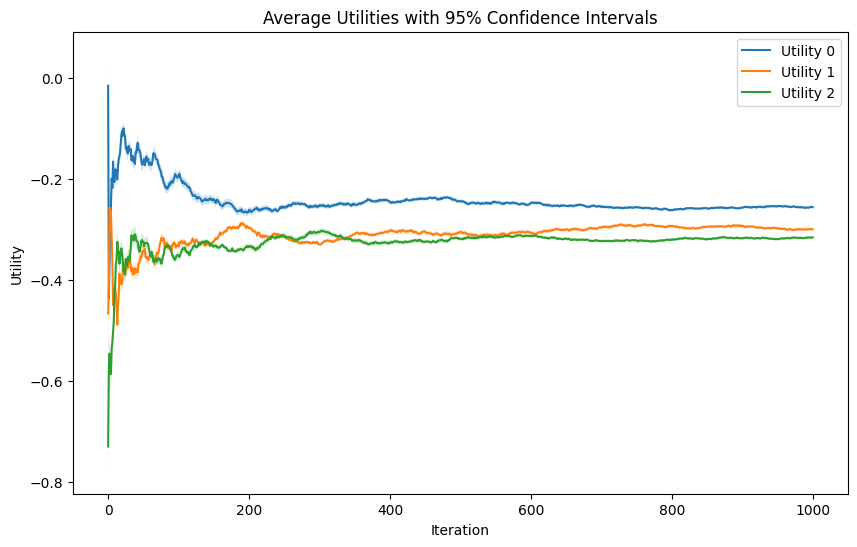

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

# Calculate mean and standard error across experiments (axis=0)
mean_utilities = experiment_utilites.mean(axis=0)
stderr_utilities = sem(experiment_utilites, axis=0)

# Plot mean with confidence interval (mean ± 1.96*stderr for ~95% CI)
df_mean = pd.DataFrame(mean_utilities)
df_stderr = pd.DataFrame(stderr_utilities)

plt.figure(figsize=(10, 6))
for col in df_mean.columns:
    plt.plot(df_mean.index, df_mean[col], label=f'Utility {col}')
    plt.fill_between(
        df_mean.index,
        df_mean[col] - 1.96 * df_stderr[col]/experiments,
        df_mean[col] + 1.96 * df_stderr[col]/experiments,
        alpha=0.2
    )

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title('Average Utilities with 95% Confidence Intervals')
plt.legend()
plt.show()